Train on 246 samples, validate on 106 samples
Epoch 1/15
246/246 [==============================] - 2s 7ms/step - loss: 1.3426 - acc: 0.5325 - val_loss: 0.6998 - val_acc: 0.4528
Epoch 2/15
246/246 [==============================] - 1s 3ms/step - loss: 0.7014 - acc: 0.4959 - val_loss: 0.6893 - val_acc: 0.5472
Epoch 3/15
246/246 [==============================] - 1s 3ms/step - loss: 0.6979 - acc: 0.4756 - val_loss: 0.7126 - val_acc: 0.4528
Epoch 4/15
246/246 [==============================] - 1s 3ms/step - loss: 0.6991 - acc: 0.5081 - val_loss: 0.6972 - val_acc: 0.4623
Epoch 5/15
246/246 [==============================] - 1s 3ms/step - loss: 0.6809 - acc: 0.5325 - val_loss: 0.6848 - val_acc: 0.4906
Epoch 6/15
246/246 [==============================] - 1s 3ms/step - loss: 0.6838 - acc: 0.5569 - val_loss: 0.6706 - val_acc: 0.5377
Epoch 7/15
246/246 [==============================] - 1s 3ms/step - loss: 0.6239 - acc: 0.6057 - val_loss: 0.7295 - val_acc: 0.6792
Epoch 8/15
246/246 [==========

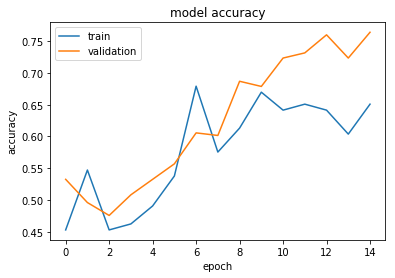

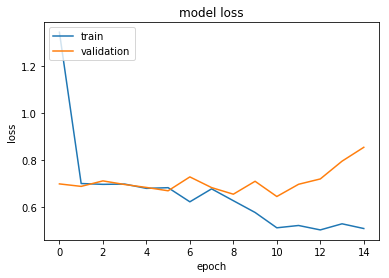

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle


# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X, y, batch_size=32, epochs=15, validation_split=0.3)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

